<a href="https://colab.research.google.com/github/Sekhudinpbg3/Aplikasi-Presensi/blob/master/Skripsi_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Persiapan
### Install yahoo finance and tensorflow js

In [ ]:
!pip install yfinance
!pip install tensorflowjs

### Import libraray

In [97]:
# library source dataset
import yfinance as yf

# library to process dataset
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# library to build, train , test model
import tensorflow as tf
import tensorflowjs as tfjs
from tensorflow import keras
print('tensorFlow version', tf.__version__)
print('tensorFlow js version', tfjs.__version__)

# library to show result training model, accuracy
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# library model sequential
from keras.models import Model, Sequential
from keras.layers import Input, Activation, Dense
from keras.utils.vis_utils import plot_model

tensorFlow version 2.8.2
tensorFlow js version 3.20.0


### Define konstanta and other global variabel

In [98]:
# define constants to prevent future changes as well as for the sake of readability

EMITEN = 'TLKM.JK'

TRAIN_START = '2019-12-12'
TRAIN_END = '2021-12-12'

TEST_START = '2022-01-01'
TEST_END = '2022-06-01'

FEATURES = ['Open', 'High', 'Low']
TARGET = ['Close']

# 2. Deklarasi fungsi reusable

In [194]:
def getData(jenis, selected):
  if jenis != 'train' and jenis != 'test':
    return 'parameter getData() salah, pilih train atau test'
  
  if selected != 'features' and selected != 'target':
    return 'parameter getData() salah, pilih features atau target'

  if jenis == 'train':
    data= yf.download(EMITEN, start=TRAIN_START, end=TRAIN_END)
    data= data[['Open', 'High', 'Low', 'Close']]
    data= data.dropna()
    if selected == 'features':
      data = data[FEATURES].values
      return data
    if selected == 'target':
      data = data[TARGET].values
      return data
  
  if jenis == 'test':
    data= yf.download(EMITEN, start=TEST_START, end=TEST_END)
    data= data[['Open', 'High', 'Low', 'Close']]
    data= data.dropna()
    if selected == 'features':
      data = data[FEATURES].values
      return data
    if selected == 'target':
      data = data[TARGET].values
      return data

def otherEmiten(emiten='BBRI.JK', selected='features', dateStart=TEST_START, dateEnd=TEST_END):
  data= yf.download(emiten, start=dateStart, end=dateEnd)
  data= data[['Open', 'High', 'Low', 'Close']]
  data= data.dropna()
  if selected == 'features':
    data = data[FEATURES].values
    return data

  if selected == 'target':
    data = data[TARGET].values
    return data
  
  if selected != 'features' and selected != 'target':
    return 'parameter getData() salah, pilih features atau target'


def plotTragetPredict(emiten, target, prediksi):
  # Accuracy Model
  mse = round(mean_squared_error(target, prediksi))
  mae = round(mean_absolute_error(target, prediksi))

  print(f'=== {emiten} ===')
  print(f'MSE :{mse}')
  print(f'MAE :{mae}')

  # Draw target vs prediction
  plt.title(f'target vs prediksi {emiten}')
  plt.plot(target, 'r', label='target') # target -- red
  plt.plot(prediksi, 'b', label='prediksi') # prediksi -- blue
  plt.legend(loc="upper left")
  plt.show()
  print('==== end ===')


# 3. Deklarasi data train dan data test

In [163]:
X_train = getData('train', 'features')
y_train = getData('train', 'target')

X_test = getData('test', 'features')
y_test = getData('test', 'target')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# 4. Model
### Membangun model

In [170]:
# model prediksi
model = Sequential()

# input layer
model.add(Dense(4, activation='relu', input_shape=(3,)))

# hidden layer
model.add(Dense(7, activation='relu'))
model.add(Dense(10, activation='relu'))

# output layer
model.add(Dense(1, activation='relu'))

# model compile
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['MeanSquaredError'])
model.summary()

# plot model
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# clear session
tf.keras.backend.clear_session()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 16        
                                                                 
 dense_1 (Dense)             (None, 7)                 35        
                                                                 
 dense_2 (Dense)             (None, 10)                80        
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 142
Trainable params: 142
Non-trainable params: 0
_________________________________________________________________


### Train Model

In [ ]:
# train
model.fit(X_train, y_train, epochs=1000, verbose=1, batch_size=10)

### Testing model

In [ ]:
# testing
y_pred = model.predict(X_test)
y_pred

### Show result

=== TLKM.JK ===
MSE :900
MAE :24


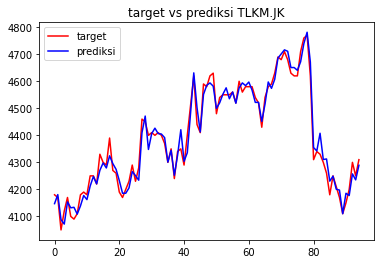

==== end ===


In [189]:
# Result Model TLKM terhadap saham TLKM.JK
plotTragetPredict('TLKM.JK', y_test, y_pred)


# 5. Tes untuk saham lain
### BBRI (PT. Bank Rakyat Indonesia) => blue chip

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
=== BBRI.JK ===
MSE :874
MAE :24


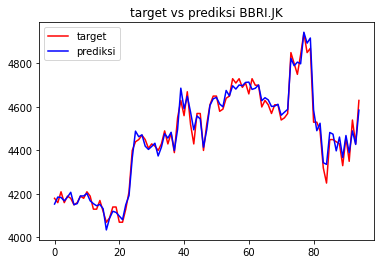

==== end ===


In [199]:
# saham BBRI
bbri_input = otherEmiten('BBRI.JK', 'features')
bbri_target = otherEmiten('BBRI.JK', 'target')

bbri_pred = model.predict(bbri_input)

# plot hasil prediksi
plotTragetPredict('BBRI.JK', bbri_target, bbri_pred)

### SIDO (PT. Sido Muncul) => second liner

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
=== SIDO.JK ===
MSE :83
MAE :7


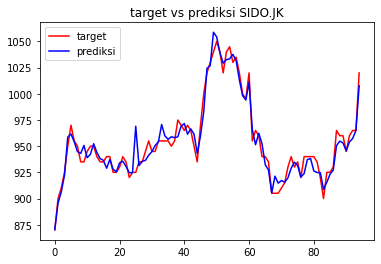

==== end ===


In [200]:
# saham SIDO
sido_input = otherEmiten('SIDO.JK', 'features')
sido_target = otherEmiten('SIDO.JK', 'target')

sido_pred = model.predict(sido_input)

# plot hasil prediksi
plotTragetPredict('SIDO.JK', sido_target, sido_pred)

### FIRE (PT. Alfa Energi Investama) => third liner

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
=== FIRE.JK ===
MSE :58
MAE :5


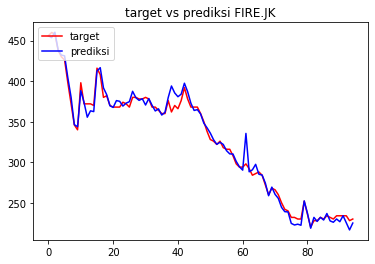

==== end ===


In [203]:
# saham FIRE
fire_input = otherEmiten('FIRE.JK', 'features')
fire_target = otherEmiten('FIRE.JK', 'target')

fire_pred = model.predict(fire_input)

# plot hasil prediksi
plotTragetPredict('FIRE.JK', fire_target, fire_pred)

# 6. save dan Konversi file Model JST

In [209]:
# simpan model to format h5 => format tf.keras
model.save('model/tf/model.h5')

# simpan model to format JSON => format tfjs
tfjs.converters.save_keras_model(model, 'model/tfs/')